# Loss Curves

Training loss curves are essential tools in machine learning for monitoring and assessing the performance of a model during the training process. These curves provide valuable insights into how well a model is learning from the training data and how well it generalizes to unseen data.

## Demo

Let's try to classify a scaled down version of MNIST. These are 8x8 images of hand drawn digits.

In [4]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

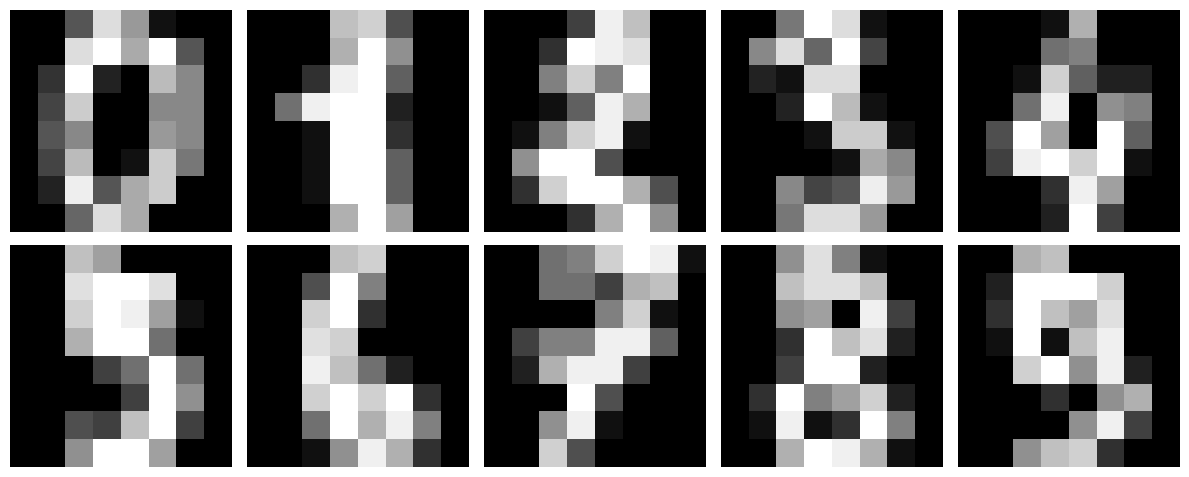

In [8]:
# Load the data
X, y = load_digits(return_X_y=True)

# Plot some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    image = X[i].reshape(8, 8)
    row_index = i // 5
    col_index = i % 5
    axes[row_index, col_index].imshow(image, cmap='gray')
    axes[row_index, col_index].axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### A Properly Fit Model
First, let's see what a loss curve should look like if everything goes well. We create a simple fully connected MLP with one hidden layer. After 30 training epochs, we can see that the test loss converges to a similar value as the training loss.

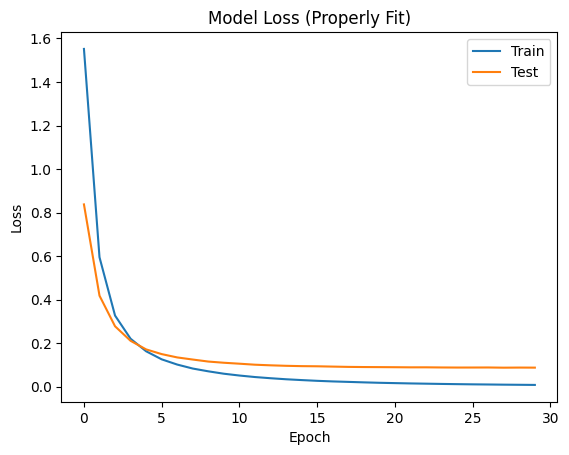

In [22]:
# Create a simple MLP
input_size = 64
hidden_size = 128
output_size = 10
model = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=0)

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Properly Fit)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### An Underfit Model
Here, we will use the same simple neural network, but with far fewer training epochs (10 vs 30). Here, we observe that both the training and test loss are still decreasing when we've stopped training. This means that adding more training epochs can increase our performance.

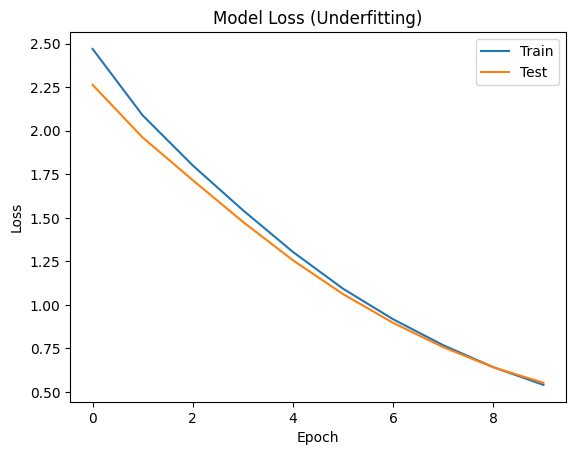

In [20]:
# Create a simple MLP
input_size = 64
hidden_size = 128
output_size = 10
model = models.Sequential([
    layers.Dense(output_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Underfitting)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### An Overfit Model
Finally, let's make our network a little bit more complex (deeper) and train it for more epochs (50 vs 30). In this case, we notice two things:
1. There is a relatively large gap between training and testing loss at convergence
2. After a while, the testing loss begins to increase

Both of these are indicative of overfitting. Our model isn't able to generalize well outside of the training data, and this problem becomes worse the more epochs we train.

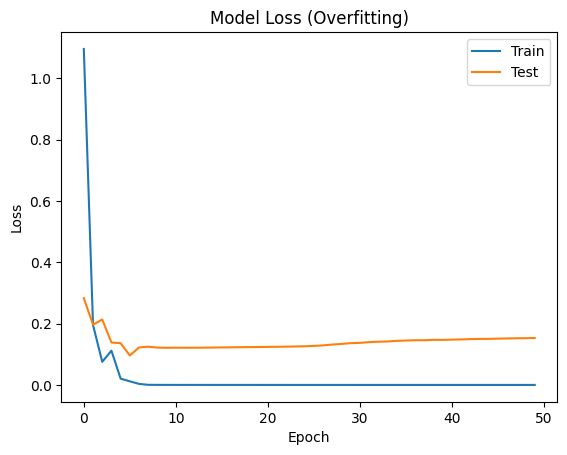

In [21]:
# Create a complex MLP
input_size = 64
hidden_size = 256
output_size = 10
model = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Overfitting)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Notes
- Loss curves are different than learning curves (covered in another notebook)
- Loss curves can diagnose a multitude of problems, not just over-/under-fitting. For example, we might also see non-converging loss, exploding loss, or repetitive loss (which each have a set of possible problems and diagnoses).

# Resources
- https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic